In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/king-county-map/king county.jpg
/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

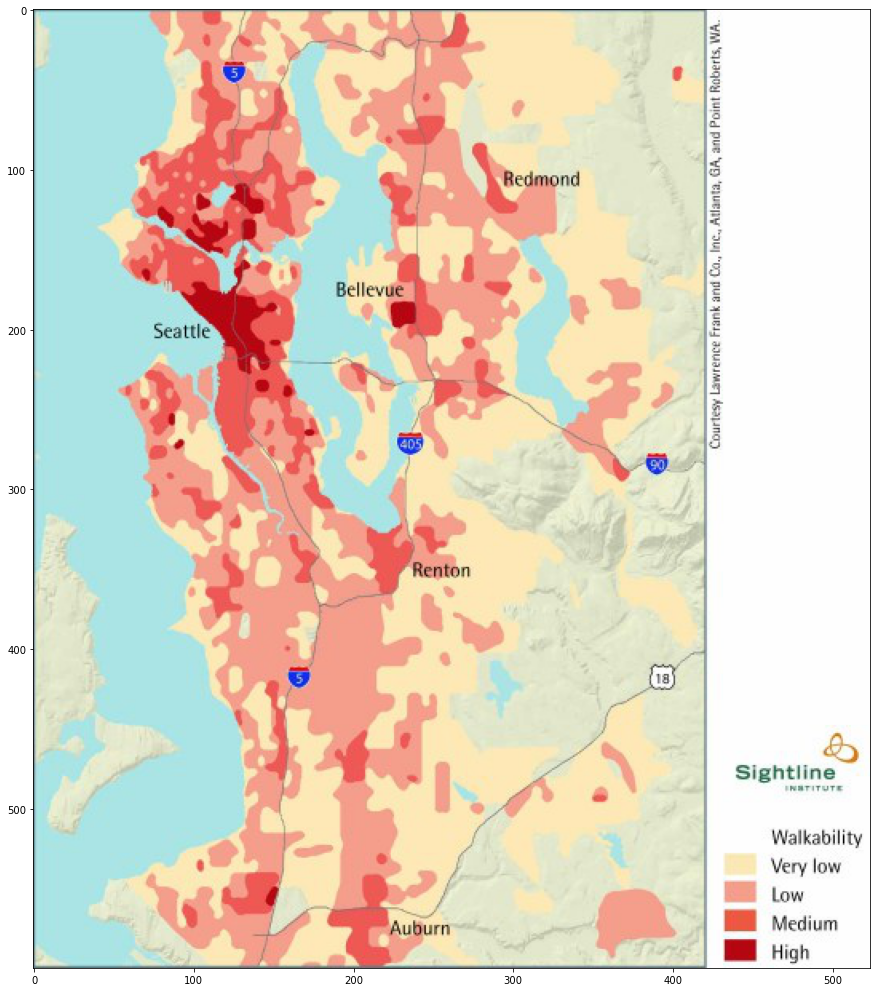

In [3]:
plt.figure(figsize=(15,18))
im=plt.imread("../input/king-county-map/king county.jpg")
plt.imshow(im) 
#This is the actual map of the county

In [4]:
df=pd.read_csv("../input/housesalesprediction/kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# 1. Exploratory Data Analysis:

In [5]:
df.isnull().sum()
# Here we see that there is no missing data in this data set

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()
#Here we get overall statistical description of our data set

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

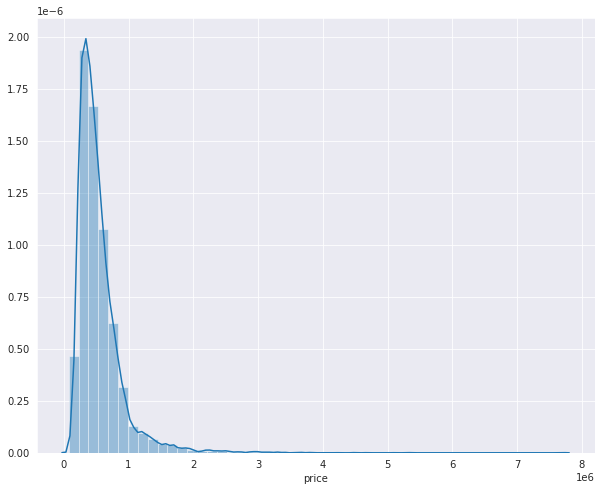

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
sns.distplot(df["price"])

In the distribution plot above, we see that the house prices are mainy distributed between 0 and 1 million dolar, and there some extreme outliers that we can just skip in order to prevent their influence over our deep learning model

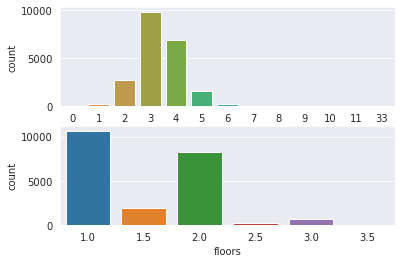

In [8]:
fig, ax = plt.subplots(2)  
sns.countplot(df["bedrooms"],  ax=ax[0])
sns.countplot(df["floors"],  ax=ax[1])



In [9]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

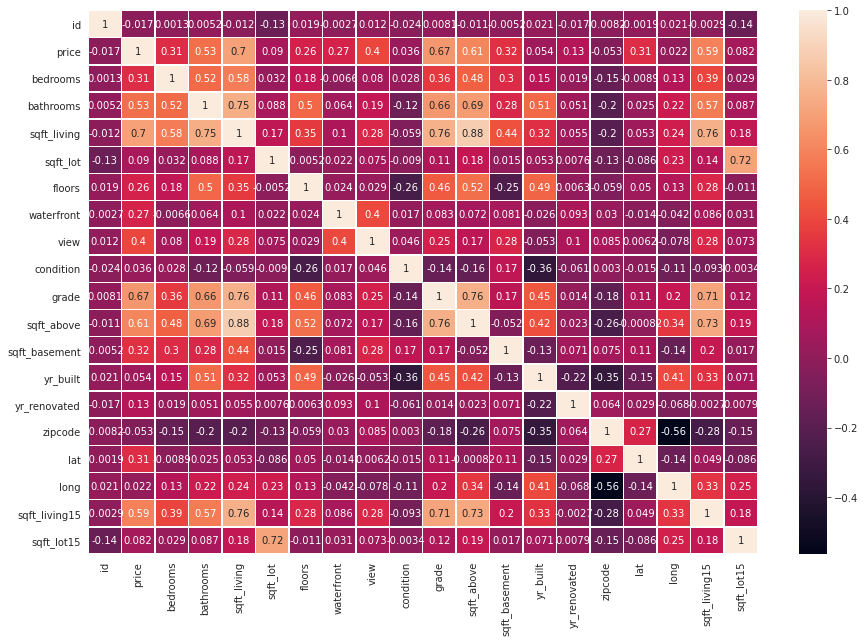

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=0.5,annot=True)

Our target is house prices, we can also special correlation of prices with the other features

In [11]:
df.corr()["price"].sort_values(ascending=False)
#Here we can clearly see that there is positive high correlation between house prices and sqft_living(Square footage of the apartments interior living space)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

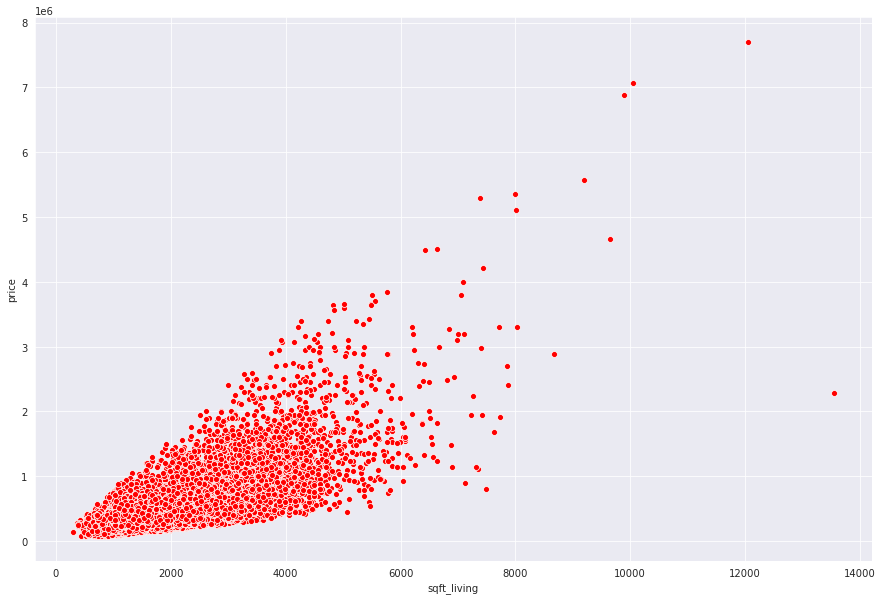

In [12]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="sqft_living", y="price", data=df,color="red")
#Here we visualize the relation between house prices and the square of the living area

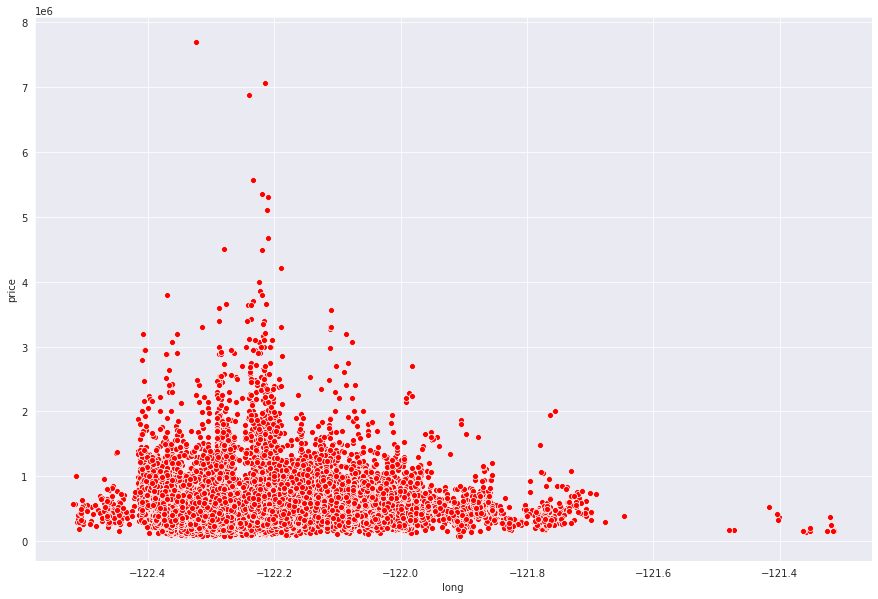

In [13]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="long", y="price", data=df, color="red")

From this plot above, we understanda that the longitude between -122.0 and -122.4 has the most expensive prices, and the lontitude -121.4 has the lowest house prices

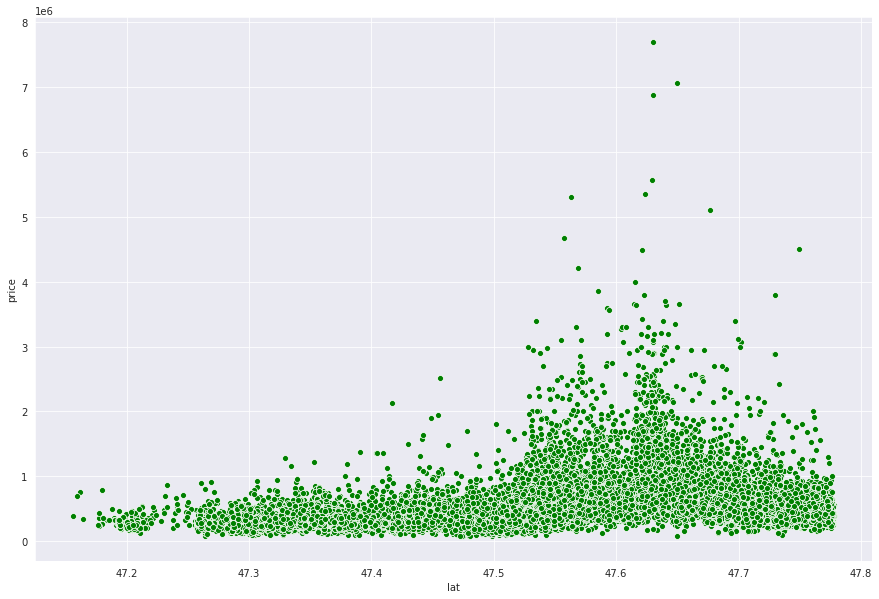

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="lat",y="price", data=df, color="green")

From this plot above, we understand that the latitude between 47.5 and 47.7 has the most expensive house prices, and the latitudes between 47.2 and 47.4 has the lowest house prices

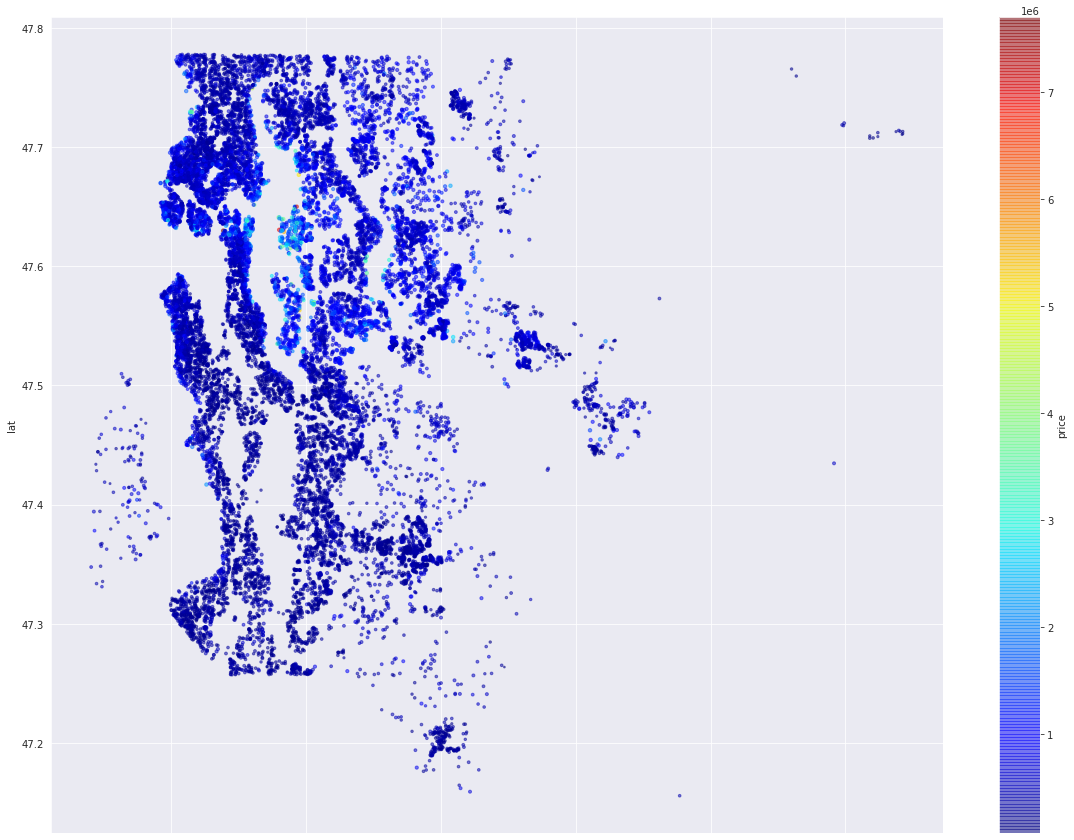

In [15]:
df.plot(x="long",y="lat",c="price", kind="scatter",alpha=0.5,figsize=(20,15), cmap=plt.get_cmap("jet"), colorbar=True, s=df["grade"])
#here we visualize the longitude and latitude and get the actual ara of the county and their relation with the price
#We can easily see that the prices between 47.7 and 47.5 latitude has the highes prices

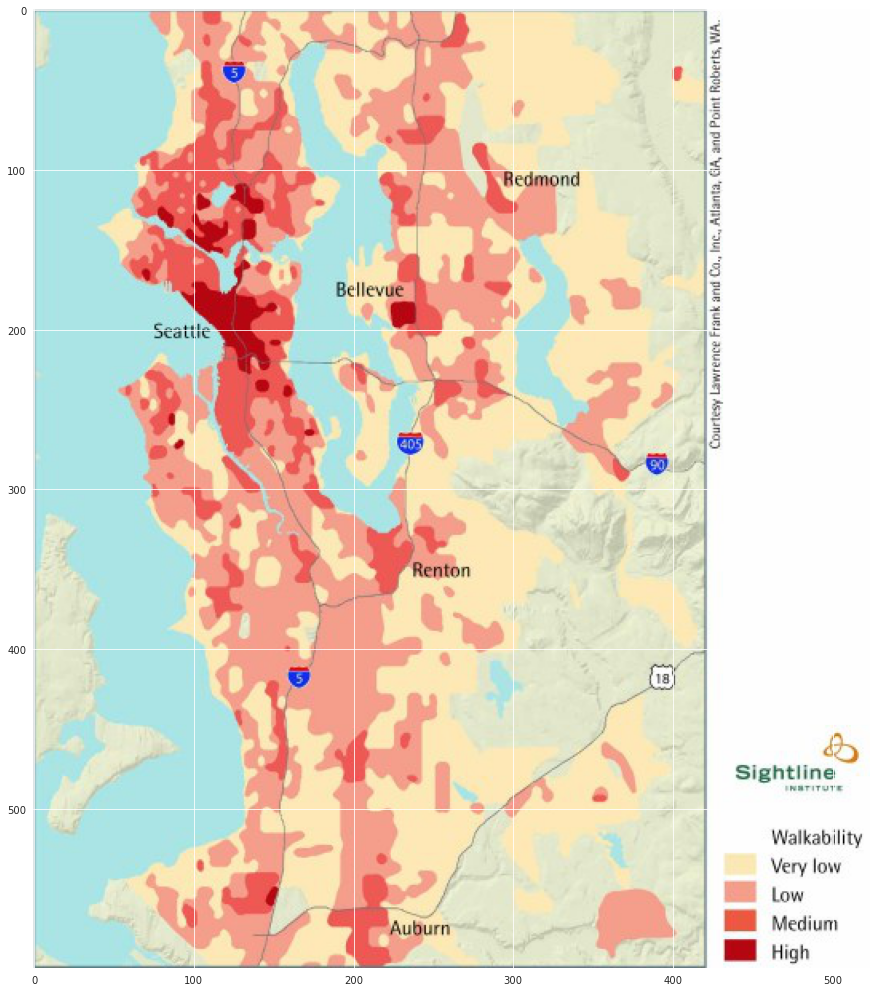

In [16]:
plt.figure(figsize=(15,20))
im=plt.imread("../input/king-county-map/king county.jpg")
plt.imshow(im) 
#This is the actual map of the county and it correlates with our langitude and latitude plot above

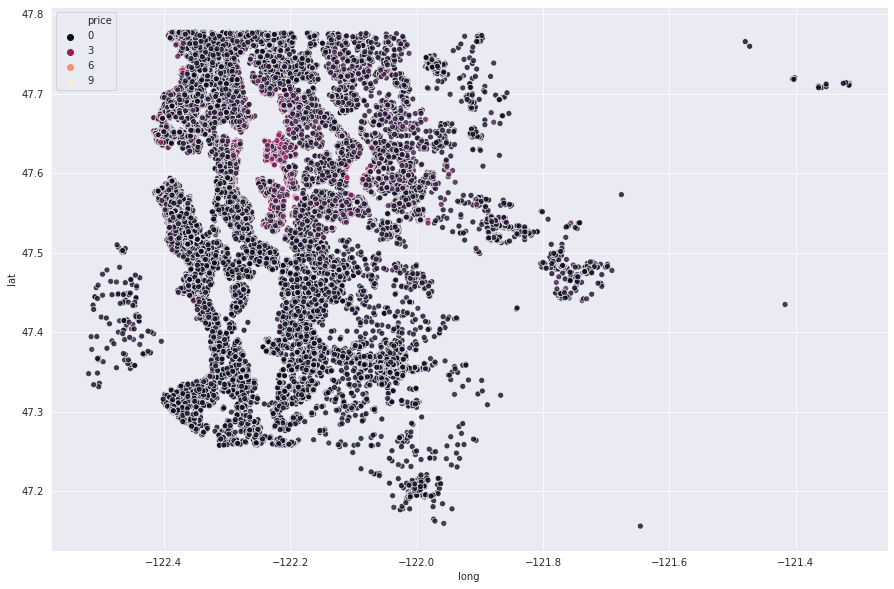

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="long",y="lat",data=df, hue="price",palette="rocket",alpha=0.8)

In order to get better distribution, we can drop some outliers

In [18]:
df.describe()["price"]
#Here we the overall statistical information about house pricess and the outliers begins from 3.2 millon dolars

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [19]:
df[df["price"]>3000000]
#Here we can see that there are only 40 houses that have higher than 3 million dolar house price

id             date      price  bedrooms  bathrooms  \
300    3225069065  20140624T000000  3075000.0         4       5.00   
656    3760500116  20141120T000000  3070000.0         3       2.50   
1164   1247600105  20141020T000000  5110800.0         5       5.25   
1315   7558700030  20150413T000000  5300000.0         6       6.00   
1448   8907500070  20150413T000000  5350000.0         5       5.00   
2085   8106100105  20141114T000000  3850000.0         4       4.25   
2444   7524900003  20141210T000000  3278000.0         2       1.75   
2626   7738500731  20140815T000000  4500000.0         5       5.50   
2864   4114601570  20141118T000000  3600000.0         3       3.25   
3914   9808700762  20140611T000000  7062500.0         5       4.50   
4149   6447300265  20141014T000000  4000000.0         4       5.50   
4411   2470100110  20140804T000000  5570000.0         5       5.75   
5880   2525049148  20141007T000000  3418800.0         5       5.00   
6508   4217402115  20150421T000000  3650000.0         6       4.75   
7035    853200010  20140701T000000  3800000.0         5       5.50   
7191   7159200005  20140507T000000  3200000.0         7       4.50   
7252   6762700020  20141013T000000  7700000.0         6       8.00   
7313   4131900066  20140825T000000  3100000.0         3       3.00   
7907   1068000375  20140923T000000  3200000.0         6       5.00   
7989   9362000040  20140623T000000  3400000.0         3       4.50   
8092   1924059029  20140617T000000  4668000.0         5       6.75   
8638   3835500195  20140618T000000  4489000.0         4       3.00   
9254   9208900037  20140919T000000  6885000.0         6       7.75   
10446  1118000320  20150508T000000  3400000.0         4       4.00   
10465   333100295  20141124T000000  3120000.0         3       3.50   
11535  8964800890  20150109T000000  3200000.0         3       3.25   
12370  6065300370  20150506T000000  4208000.0         5       6.00   
12872  2424049029  20140529T000000  3100000.0         6       4.25   
13528  3025059124  20140828T000000  3168750.0         5       3.50   
13967  3126059023  20150303T000000  3395000.0         4       3.50   
14083  3625059043  20140904T000000  3300000.0         5       4.75   
15255  2425049063  20140911T000000  3640900.0         4       3.25   
15258  1732800780  20150212T000000  3065000.0         5       3.00   
15482   624069108  20140812T000000  3200000.0         4       3.25   
16302  7397300170  20140530T000000  3710000.0         4       3.50   
16969  3025059093  20140729T000000  3100000.0         5       5.25   
18199  3625059152  20141230T000000  3300000.0         3       3.25   
18302  6072800246  20140702T000000  3300000.0         5       6.25   
18477  1346300150  20141020T000000  3300000.0         8       4.00   
18482  4389201095  20150511T000000  3650000.0         5       3.75   
19017  2303900100  20140911T000000  3800000.0         3       4.25   
19148  3625049042  20141011T000000  3635000.0         5       6.00   
20295   251500080  20140826T000000  3204000.0         4       4.00   
20460  9808100150  20150402T000000  3345000.0         5       3.75   
21576  9253900271  20150107T000000  3567000.0         5       4.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
300           4550     18641     1.0           1     4  ...     10   
656           3930     55867     1.0           1     4  ...      8   
1164          8010     45517     2.0           1     4  ...     12   
1315          7390     24829     2.0           1     4  ...     12   
1448          8000     23985     2.0           0     4  ...     12   
2085          5770     21300     2.0           1     4  ...     11   
2444          6840     10000     2.5           1     4  ...     11   
2626          6640     40014     2.0           1     4  ...     12   
2864          5020     12431     2.0           1     4  ...     10   
3914         10040     37325     2.0           1     2  ...     11   
4149          7080     1

#Therefore, I will just create a new data frame without these outliers and create geographical maps again

In [20]:
df_without_outliers=df.sort_values("price",ascending=False).iloc[46:]
df_without_outliers.sort_values("price",ascending=False).head()
#Now we have created a new data frame that has house prices lower than 3 million dolars

id             date      price  bedrooms  bathrooms  \
11257  3761100045  20140618T000000  3000000.0         4       4.25   
2899   9808100100  20150202T000000  3000000.0         5       3.25   
20325   518500480  20140811T000000  3000000.0         3       3.50   
21530  8964800330  20150407T000000  3000000.0         4       3.75   
20441  1925059254  20150507T000000  2998000.0         5       4.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
11257         4850     12445     2.0           1     4  ...     10   
2899          5370     14091     2.0           0     0  ...     10   
20325         4410     10756     2.0           1     4  ...     11   
21530         5090     14823     1.0           0     0  ...     11   
20441         6670     16481     2.0           0     0  ...     12   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11257        3850           1000      1989             0    98034  47.7011   
2899         3850           1520      1918          2008    98004  47.6499   
20325        3430            980      2014             0    98056  47.5283   
21530        4180            910      2013             0    98004  47.6200   
20441        4960           1710      2007             0    98004  47.6409   

          long  sqft_living15  sqft_lot15  
11257 -122.244           3350       12210  
2899  -122.216           2410       12047  
20325 -122.205           3550        5634  
21530 -122.207           3030       12752  
20441 -122.221           4800       16607  

[5 rows x 21 columns]

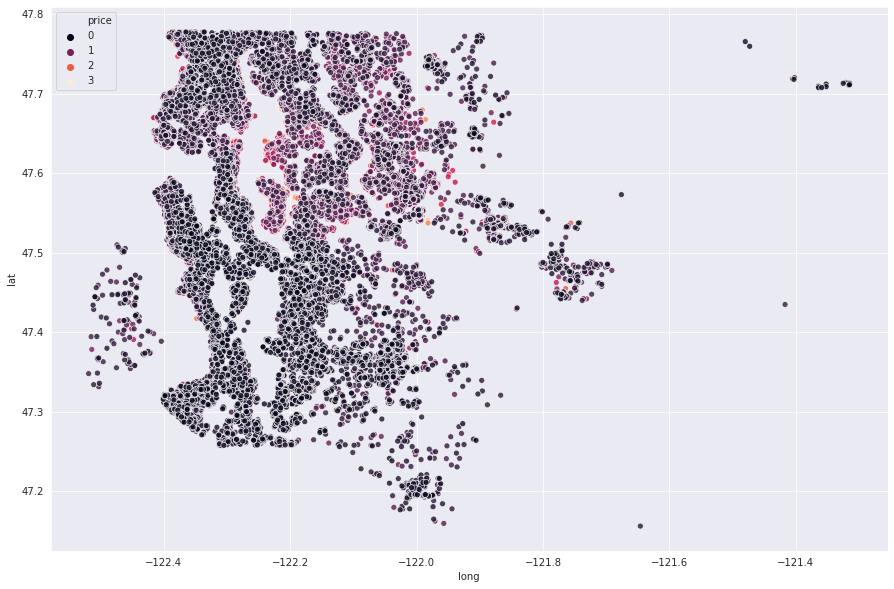

In [21]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="long",y="lat",data=df_without_outliers, hue="price",palette="rocket",alpha=0.8)

Now we can see better the price distribution according to the latitude and longitude

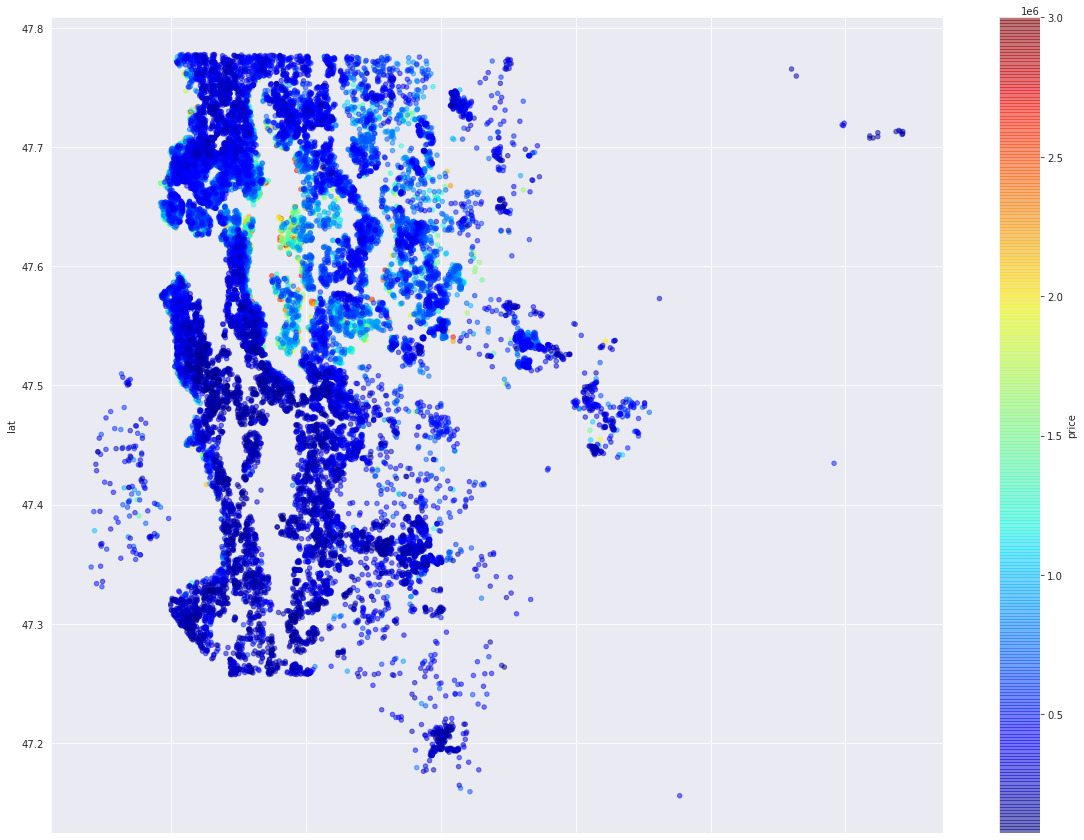

In [22]:
df_without_outliers.plot(x="long",y="lat",c="price", kind="scatter",alpha=0.5,figsize=(20,15), cmap=plt.get_cmap("jet"), colorbar=True)


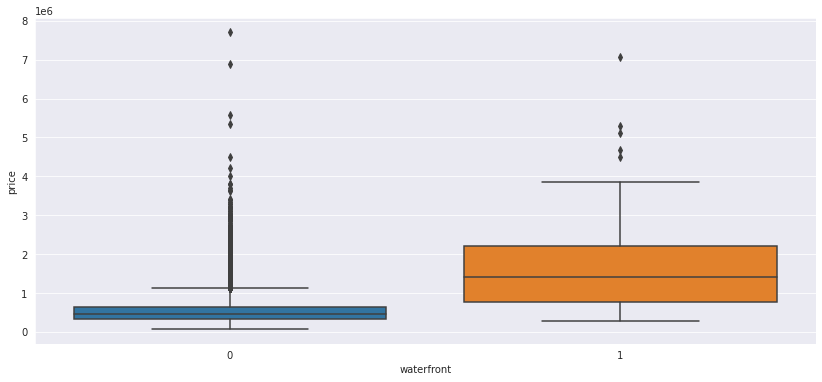

In [23]:
plt.figure(figsize=(14,6))
sns.boxplot(x="waterfront", y="price", data=df)

The boxplot above shows that the houses near waterfront have higher house prices

# 2. Feature Engineering:

In [24]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

we can just drop the id column because it has nor a special mening for predicting house prices

In [25]:
df.drop("id",axis=1, inplace=True)
df.head(3) # Now we dropped the id column from the data frame

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0         3       1.00         1180      5650   
1  20141209T000000  538000.0         3       2.25         2570      7242   
2  20150225T000000  180000.0         2       1.00          770     10000   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          3      7        1180              0   
1     2.0           0     0          3      7        2170            400   
2     1.0           0     0          3      6         770              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   

   sqft_lot15  
0        5650  
1        7639  
2        8062

In [26]:
df["date"]=pd.to_datetime(df["date"])
df.head(3) #here we have changed the structure of the date column in order use it better and make some feature engineering

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062

In [27]:
#Here we will create two new columns by feature enginnering in order to analyze data according time properties
df["year"]=df["date"].apply(lambda date: date.year)
df["month"]=df["date"].apply(lambda date: date. month)

In [28]:
df[["year","month"]].head()
#Here we have added our new feature that were hidden in the date column

year  month
0  2014     10
1  2014     12
2  2015      2
3  2014     12
4  2015      2

In [29]:
df.groupby("month").mean()["price"]
#here we cna see the average price per month

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

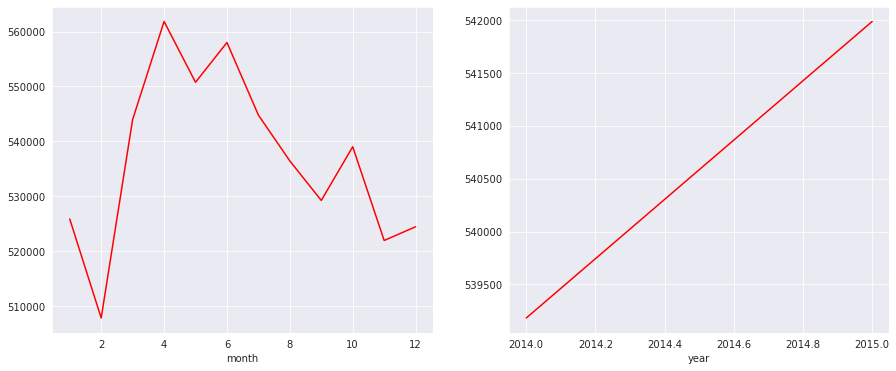

In [30]:
fig, ax = plt.subplots(1,2) 
df.groupby("month").mean()["price"].plot(ax=ax[0], figsize=(15,6),c="red")
df.groupby("year").mean()["price"].plot(ax=ax[1], figsize=(15,6),c="red")
#In the plot below, we see that the prices tends to become higher from march to july
#The housing prices rise up from 2014 to 2015

In [31]:
df.drop("date", axis=1, inplace=True)
#There is not to do with the date column and we get all the useful data via feature engineering

In [32]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0     0          3      7  ...              0      1955             0   
1     0          3      7  ...            400      1951          1991   
2     0          3      6  ...              0      1933             0   
3     0          5      7  ...            910      1965             0   
4     0          3      8  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year  month  
0    98178  47.5112 -122.257           1340        5650  2014     10  
1    98125  47.7210 -122.319           1690        7639  2014     12  
2    98028  47.7379 -122.233           2720        8062  2015      2  
3    98136  47.5208 -122.393           1360        5000  2014     12  
4    98074  47.6168 -122.045           1800        7503  2015      2  

[5 rows x 21 columns]

In [33]:
df["zipcode"].value_counts()
# we need to drop zipcode column because ml algorithm will treat this as continues value and then cause wrong predcitions
# We can not make them dummy variables because there 70 ifferent zip codes

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [34]:
df.drop("zipcode", axis=1, inplace=True)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15  year  month  
0  47.5112 -122.257           1340        5650  2014     10  
1  47.7210 -122.319           1690        7639  2014     12  
2  47.7379 -122.233           2720        8062  2015      2  
3  47.5208 -122.393           1360        5000  2014     12  
4  47.6168 -122.045           1800        7503  2015      2

Below we will make some feature engineering for yr_renovated column because majority of the houses are not renovated

In [35]:
def renovation(feature):
    if feature > 0:
        feature=1
    return feature
#here we create a function that will assign 1 for those that are renovated and 0 those that are not renovated
        

In [36]:
df["yr_renovated"]=df["yr_renovated"].apply(renovation)

In [37]:
df["yr_renovated"]. value_counts(). head(70)
#Now we have just two class as 0 for non-renovated ones and 1 for renovated ones

0    20699
1      914
Name: yr_renovated, dtype: int64

Now our data is ready for machine learning algorithm

# 3. Splitting Data and Training the Algorithm:

In [38]:
#Here we assign features  to the X and price to the y 
X=df.drop("price",axis=1).values
y=df["price"].values

In [39]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 2.014e+03,
        1.000e+01],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 2.014e+03,
        1.200e+01],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.015e+03,
        2.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 2.014e+03,
        6.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 2.015e+03,
        1.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 2.014e+03,
        1.000e+01]])

In [40]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)
#Here we split our data as train and test set

The next step is to chech whether our data shapes in train and test set comply with each other

In [43]:
X_train.shape

(15129, 19)

In [44]:
y_train.shape

(15129,)

In [45]:
X_test.shape

(6484, 19)

In [46]:
y_test.shape

(6484,)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [48]:
model=Sequential() #here we get an insance of our model
model.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model.add(Dense(1)) # here we add a dthe fina layer with 1 neurons because we have one output, that is the house price


In [49]:
model.compile(optimizer="adam", loss="mse")
#Here assign adam optimizer as our optimizer and mean squared error as our loss function for our deep learning model

In [50]:
model.fit(x= X_train, y= y_train, batch_size=128, epochs=300, validation_data=(X_test, y_test))
#Here we fit our model into the training X and y set with batch_size 128 and 300 epaochs, and we use also test dataset as validation

Epoch 1/300
119/119 [==============================] - 0s 3ms/step - loss: 387380805632.0000 - val_loss: 320353075200.0000
Epoch 2/300
119/119 [==============================] - 0s 2ms/step - loss: 275027361792.0000 - val_loss: 190005477376.0000
Epoch 3/300
119/119 [==============================] - 0s 2ms/step - loss: 114320949248.0000 - val_loss: 81683005440.0000
Epoch 4/300
119/119 [==============================] - 0s 2ms/step - loss: 81626693632.0000 - val_loss: 76819619840.0000
Epoch 5/300
119/119 [==============================] - 0s 2ms/step - loss: 77418364928.0000 - val_loss: 74595565568.0000
Epoch 6/300
119/119 [==============================] - 0s 2ms/step - loss: 73971089408.0000 - val_loss: 70799818752.0000
Epoch 7/300
119/119 [==============================] - 0s 2ms/step - loss: 70943612928.0000 - val_loss: 68599357440.0000
Epoch 8/300
119/119 [==============================] - 0s 2ms/step - loss: 69073969152.0000 - val_loss: 67584061440.0000
Epoch 9/300
119/119 [======

# 4. Predicting and Evaluation of the Model's Performance

In [51]:
pd.DataFrame(model.history.history)
#Here we can see losses in both our loss function and validation loss in the test data 

loss      val_loss
0    3.873808e+11  3.203531e+11
1    2.750274e+11  1.900055e+11
2    1.143209e+11  8.168301e+10
3    8.162669e+10  7.681962e+10
4    7.741836e+10  7.459557e+10
..            ...           ...
295  5.188732e+10  5.092046e+10
296  5.171874e+10  5.043477e+10
297  5.169532e+10  5.129053e+10
298  5.146475e+10  5.112951e+10
299  5.178316e+10  5.075642e+10

[300 rows x 2 columns]

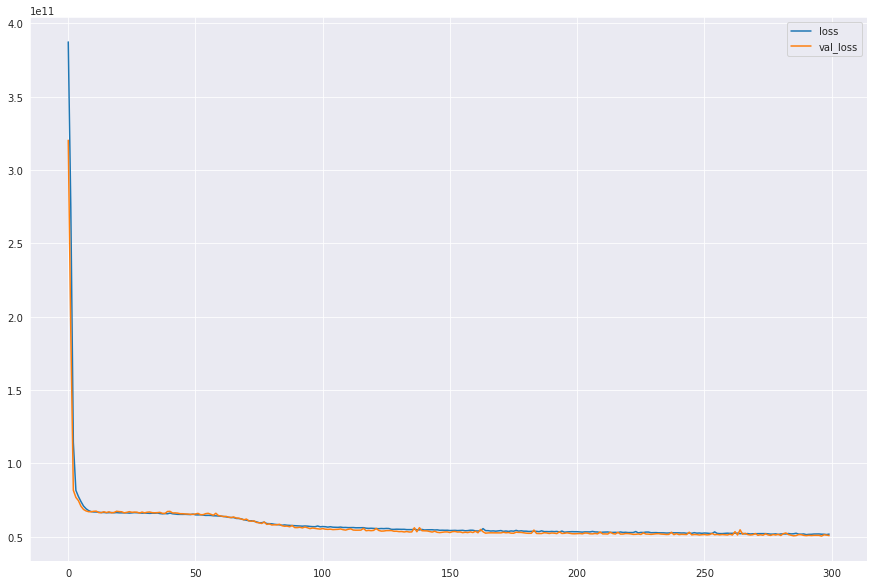

In [52]:

pd.DataFrame(model.history.history).plot(figsize=(15,10))
#There happens a decrease in both our training and validation loss to a certain point and become stable after 60.th epoch
#Moreover there is no overfitting because both lines goes with a perfect harmony

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [54]:
predictions=model.predict(X_test) #here the trained algorithm makes predictions

In [55]:
print("The absolute mean error :",mean_absolute_error(y_test, predictions))
print("The squared mean error :",mean_squared_error(y_test, predictions))
print("The squared mean error :",np.sqrt(mean_squared_error(y_test, predictions)))


The absolute mean error : 147610.699262126
The squared mean error : 50756415626.01521
The squared mean error : 225291.8454494419


In [56]:
print("The mean of the real data: ",df["price"].mean())
print("The absolute mean error :",mean_absolute_error(y_test, predictions))

The mean of the real data:  540088.1417665294
The absolute mean error : 147610.699262126


> There is 149 000 dolar error and it means %20 procent error that our model makes

In [57]:
print("The Variance Score :", explained_variance_score(y_test, predictions))
#The variance shows how many percent that our model can explain,so our model can explain %58 procent accurately

The Variance Score : 0.6147557070365015


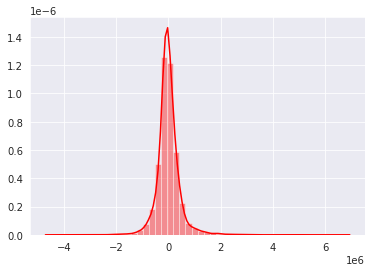

In [58]:
sns.distplot((y_test-predictions),color="red")

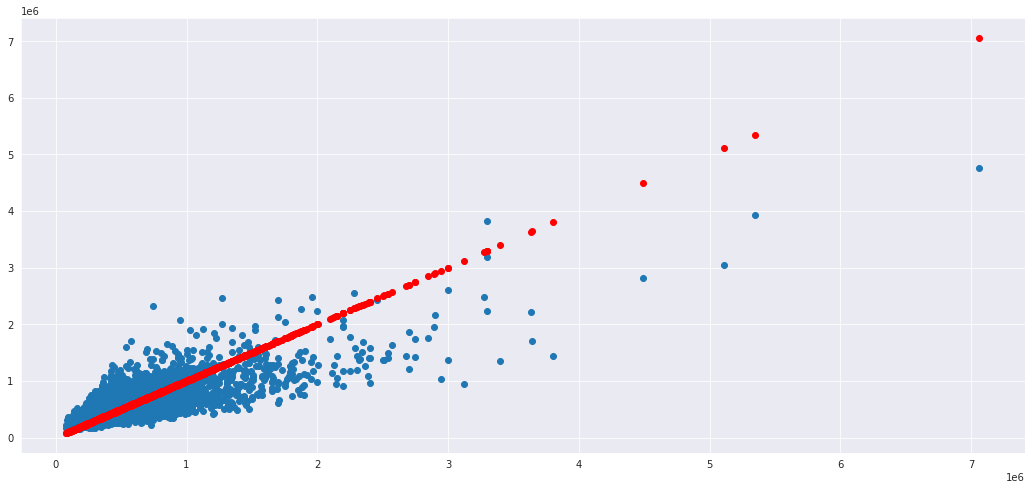

In [59]:
plt.figure(figsize=(18,8))
plt.scatter(y_test, predictions)
plt.scatter(y_test,y_test,color="red")
#In this we can see that our model predict lower and normal house prices very good, but the oulier not good
#The outlier affects negatively the performance of our model

Because  the predictions of our model is not good enough, we will standardize our features and retrain the model

# 5. Retraining Our Model

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler=StandardScaler()

In [62]:
scaler.fit(X_train)

StandardScaler()

In [63]:
scaler.transform(X_train)

array([[-0.41093216,  0.48981281, -0.22161052, ..., -0.21273107,
        -0.68930146, -0.18885595],
       [-1.51050638,  0.48981281, -0.27606345, ..., -0.21424158,
        -0.68930146,  0.45407871],
       [-0.41093216,  0.48981281, -0.3958599 , ...,  2.2863964 ,
        -0.68930146, -0.18885595],
       ...,
       [ 0.68864206,  0.16777648, -0.03647054, ...,  0.69734708,
        -0.68930146,  1.09701337],
       [-0.41093216,  0.16777648, -0.92949865, ..., -0.19173508,
        -0.68930146, -0.18885595],
       [ 0.68864206, -0.15425985,  0.21401295, ..., -0.10824202,
        -0.68930146,  0.13261138]])

In [64]:
scaler.transform(X_test)

array([[-1.51050638, -1.44240518, -1.2126539 , ..., -0.20517856,
         1.45074406, -1.7961926 ],
       [-1.51050638, -1.44240518, -1.33245035, ..., -0.3255279 ,
         1.45074406, -1.15325794],
       [-0.41093216, -0.15425985, -0.30873521, ..., -0.04634915,
        -0.68930146,  0.45407871],
       ...,
       [-1.51050638, -0.47629618, -0.60278105, ..., -0.2278361 ,
        -0.68930146,  0.13261138],
       [ 0.68864206,  0.48981281,  2.16342796, ...,  3.38853504,
        -0.68930146,  1.41848071],
       [-0.41093216,  0.48981281,  0.31202823, ..., -0.34750572,
         1.45074406, -0.83179061]])

Now we rescaled our features and it is ready for ML algorithm

In [65]:
model2=Sequential() #here we get an insance of our model
model2.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model2.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model2.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model2.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model2.add(Dense(1)) # here we add a dthe fina layer with 1 neurons because we have one output, that is the house price

In [66]:
model2.compile(optimizer="adam", loss="mse")
#Here assign adam optimizer as our optimizer and mean squared error as our loss function for our deep learning model

In [67]:
model2.fit(x= X_train, y= y_train, batch_size=64, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
237/237 [==============================] - 0s 2ms/step - loss: 362144169984.0000 - val_loss: 266674143232.0000
Epoch 2/300
237/237 [==============================] - 0s 2ms/step - loss: 158081777664.0000 - val_loss: 86644129792.0000
Epoch 3/300
237/237 [==============================] - 0s 2ms/step - loss: 85677867008.0000 - val_loss: 79436120064.0000
Epoch 4/300
237/237 [==============================] - 0s 2ms/step - loss: 78223163392.0000 - val_loss: 73945587712.0000
Epoch 5/300
237/237 [==============================] - 0s 2ms/step - loss: 73029246976.0000 - val_loss: 70709477376.0000
Epoch 6/300
237/237 [==============================] - 0s 2ms/step - loss: 69373091840.0000 - val_loss: 67904499712.0000
Epoch 7/300
237/237 [==============================] - 0s 2ms/step - loss: 67395698688.0000 - val_loss: 66602164224.0000
Epoch 8/300
237/237 [==============================] - 0s 2ms/step - loss: 66541522944.0000 - val_loss: 66822848512.0000
Epoch 9/300
237/237 [========

In [68]:
pd.DataFrame(model2.history.history)

loss      val_loss
0    3.621442e+11  2.666741e+11
1    1.580818e+11  8.664413e+10
2    8.567787e+10  7.943612e+10
3    7.822316e+10  7.394559e+10
4    7.302925e+10  7.070948e+10
..            ...           ...
295  4.649343e+10  4.538261e+10
296  4.593180e+10  4.605928e+10
297  4.613768e+10  4.606214e+10
298  4.588600e+10  4.466751e+10
299  4.628991e+10  4.521529e+10

[300 rows x 2 columns]

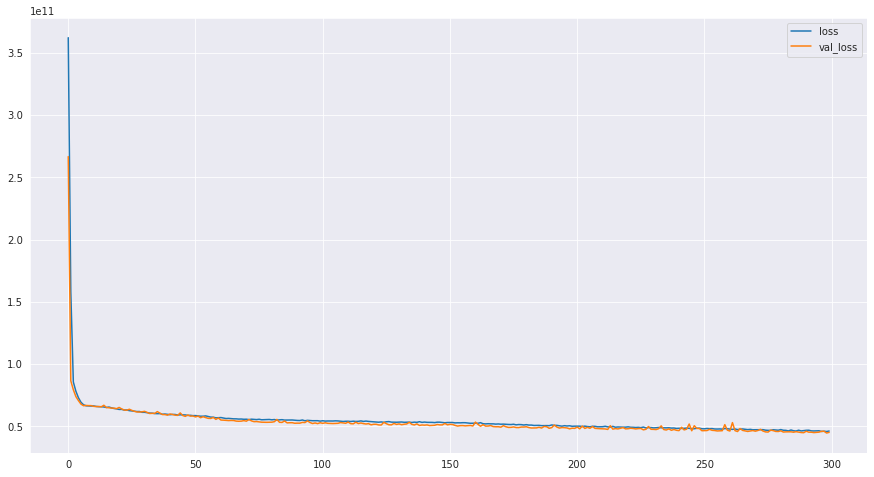

In [69]:
pd.DataFrame(model2.history.history).plot(figsize=(15,8))

In [70]:
predictions2=model2.predict(X_test)

In [71]:
print("The absolute mean error :",mean_absolute_error(y_test, predictions2))
print("The squared mean error :",mean_squared_error(y_test, predictions2))
print("The squared mean error :",np.sqrt(mean_squared_error(y_test, predictions2)))


The absolute mean error : 139606.75360382287
The squared mean error : 45215303431.91986
The squared mean error : 212638.9038532692


In [72]:
print("The mean of the real data: ",df["price"].mean())
print("The absolute mean error :",mean_absolute_error(y_test, predictions2))

The mean of the real data:  540088.1417665294
The absolute mean error : 139606.75360382287


Now our model decreased mean error from 149 000 dolar to 135 000.

In [73]:
print("The Variance Score :", explained_variance_score(y_test, predictions2))
#The variance shows how many percent that our model can explain,so our model can explain %58 procent accurately

The Variance Score : 0.657099139689235


The variance also increased from %58 to %65

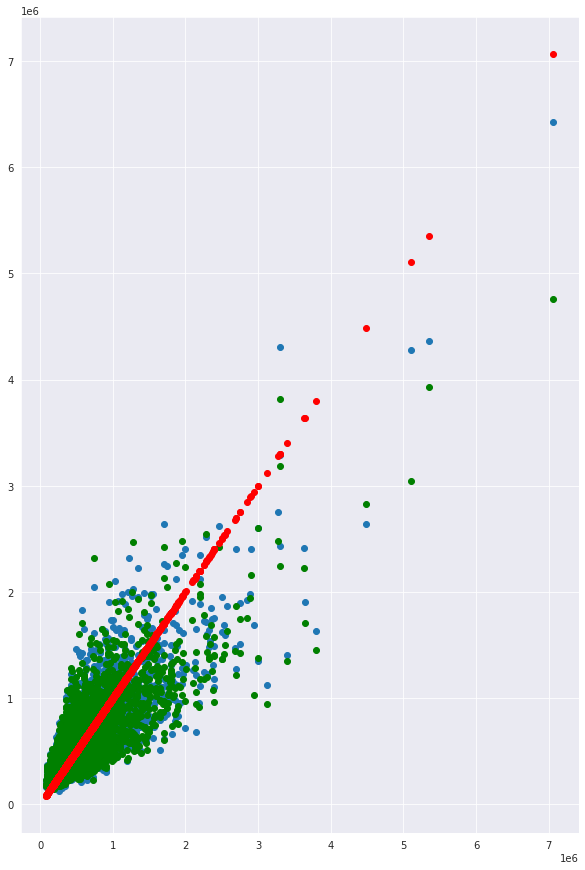

In [74]:

plt.figure(figsize=(10,15))
plt.scatter(y_test,predictions2)
plt.scatter(y_test,predictions, color="green")
plt.scatter(y_test,y_test, color="red")

Now we will use linear regression:

In [75]:
X=df.drop("price", axis=1)
y=df["price"]

In [76]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model3=LinearRegression()

In [79]:
model3.fit(X_train,y_train)

LinearRegression()

In [80]:
predictions3=model3.predict(X_test)

In [81]:
print("Predictions of Linear Regression:",mean_absolute_error(y_test,predictions3))

Predictions of Linear Regression: 123616.59232502527


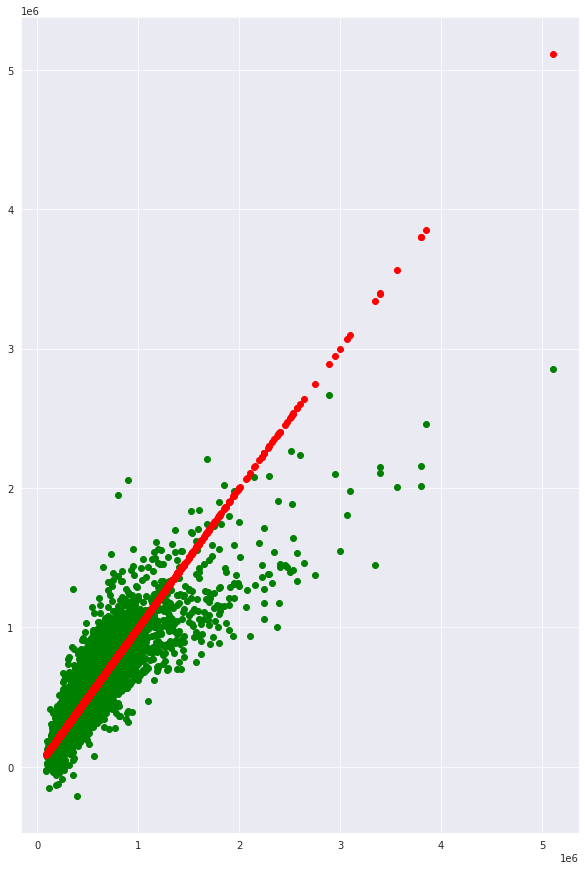

In [82]:

plt.figure(figsize=(10,15))
plt.scatter(y_test,predictions3, color="green")
plt.scatter(y_test,y_test, color="red")


Linear Regression performs better than our deep learning model

In [83]:
model4=Sequential() #here we get an insance of our model
model4.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model4.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model4.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model4.add(Dense(19, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
model4.add(Dense(1)) # here we add a dthe fina layer with 1 neurons because we have one output, that is the house price

In [84]:
model4.compile(optimizer="rmsprop",loss="mse")

In [85]:
model4.fit(x= X_train, y= y_train, batch_size=64, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
254/254 [==============================] - 0s 2ms/step - loss: 338247057408.0000 - val_loss: 217699713024.0000
Epoch 2/300
254/254 [==============================] - 0s 1ms/step - loss: 163053912064.0000 - val_loss: 83943186432.0000
Epoch 3/300
254/254 [==============================] - 0s 1ms/step - loss: 89024143360.0000 - val_loss: 75269767168.0000
Epoch 4/300
254/254 [==============================] - 0s 1ms/step - loss: 79986098176.0000 - val_loss: 69769363456.0000
Epoch 5/300
254/254 [==============================] - 0s 1ms/step - loss: 74437877760.0000 - val_loss: 65724542976.0000
Epoch 6/300
254/254 [==============================] - 0s 1ms/step - loss: 70992191488.0000 - val_loss: 65144221696.0000
Epoch 7/300
254/254 [==============================] - 0s 1ms/step - loss: 69166915584.0000 - val_loss: 63143522304.0000
Epoch 8/300
254/254 [==============================] - 0s 1ms/step - loss: 68429430784.0000 - val_loss: 63097204736.0000
Epoch 9/300
254/254 [========

In [86]:
predictions4=model4.predict(X_test)

In [87]:
print(mean_absolute_error(y_test,predictions4))

148279.811479344


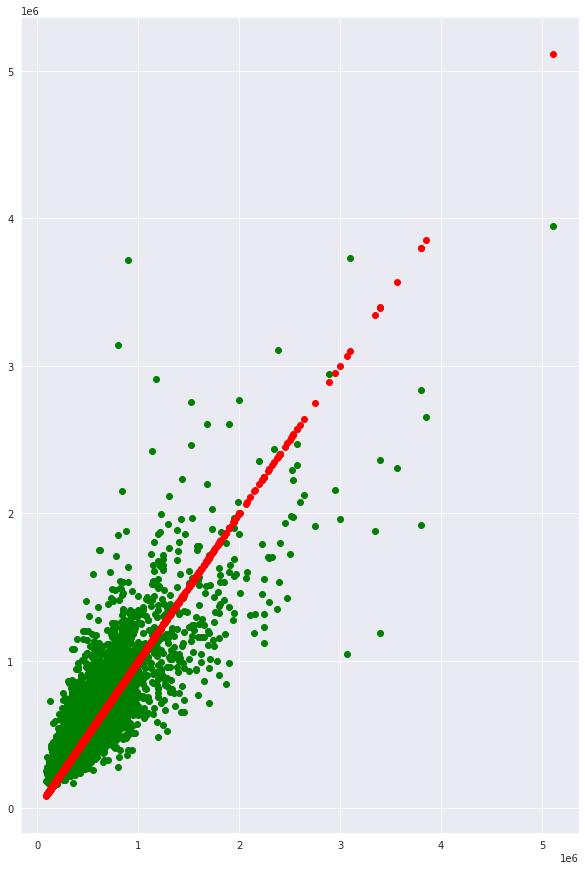

In [88]:
plt.figure(figsize=(10,15))
plt.scatter(y_test,predictions4, color="green")
plt.scatter(y_test,y_test, color="red")


We changed the optimizer from adams to rmsprop, but predictions are worse than before.

The next step is to drop the outliers and train the model again